This notebooks shows how to use the tmask from mesh_mask.nc file to mask variables.

It also compared the timing of using tmask vs searching for zeros.

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f = nc.Dataset('/results/SalishSea/nowcast/11jan15/SalishSea_1h_20150111_20150111_grid_T.nc')

sal = f.variables['vosaline'][:]
t = f.variables['votemper'][:]

# Loading and manipulating mask

In [3]:
%%timeit -n1 -r1
mesh = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
tmask = mesh.variables['tmask'][:]
np_mask = np.abs(1-tmask) #tmask is zero on land, one on water. We need the opposite for numpy masking

np_mask=np_mask +np.zeros(sal.shape) #expanding time dimension of tmask so that it can be applied to full array.

1 loops, best of 1: 1.17 s per loop


In [4]:
mesh = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
tmask = mesh.variables['tmask'][:]
np_mask = np.abs(1-tmask) 
np_mask=np_mask +np.zeros(sal.shape) 


# Masking one variable
a. Searching for zeros

In [5]:
%%timeit -n1 -r5

sal_m = np.ma.masked_values(sal,0)

1 loops, best of 5: 8.97 s per loop


b. Using tmask

In [6]:
%%timeit -n1 -r5

sal_t = np.ma.masked_array(sal,mask=np_mask)

1 loops, best of 5: 301 ms per loop


# Masking two variables
a. Searching for zeros

In [7]:
%%timeit -n1 -r5

sal_m2 = np.ma.masked_values(sal,0)
t_m2 = np.ma.masked_values(t,0)

1 loops, best of 5: 13.6 s per loop


b. Using tmask

In [8]:
%%timeit -n1 -r5

sal_t2 = np.ma.masked_array(sal,mask=np_mask)
t_t2 = np.ma.masked_array(t,mask=np_mask)

1 loops, best of 5: 603 ms per loop


# Check masking

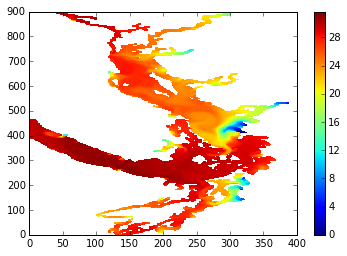

In [9]:
sal_m = np.ma.masked_values(sal,0)
plt.pcolormesh(sal_m[0,0,:,:])
plt.colorbar()

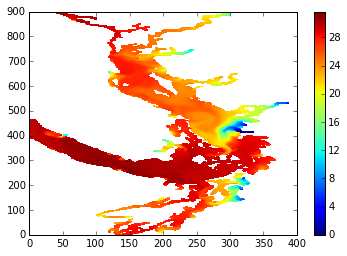

In [10]:
sal_t = np.ma.masked_array(sal,mask=np_mask)
plt.pcolormesh(sal_t[0,0,:,:])
plt.colorbar()